# RTDC Task A
1.	Write a short algorithm to detect the cell contours
2.	Detect if there is any background brightness drift over time and correct for it


In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# !pip install dclab

/usr/local/lib/python3.7/dist-packages/dclab/rtdc_dataset/config.py:79: WrongConfigurationTypeWarning: Type of confguration key [imaging]: roi position x should be <class 'numbers.Integral'>, got <class 'numpy.float64'>!
  WrongConfigurationTypeWarning)
/usr/local/lib/python3.7/dist-packages/dclab/rtdc_dataset/config.py:79: WrongConfigurationTypeWarning: Type of confguration key [imaging]: roi position y should be <class 'numbers.Integral'>, got <class 'numpy.float64'>!
  WrongConfigurationTypeWarning)


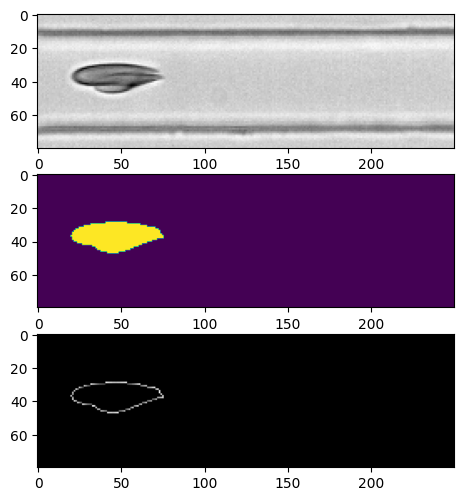

In [ ]:
# A short algorithm to detect the cell contours
# Cell images, masks, contours loading and visualization
import dclab 
import numpy as np
import matplotlib.pyplot as plt

ds = dclab.new_dataset("/content/gdrive/MyDrive/de_job_application/Data002.rtdc")
idx = 6  # Take this index as the example
image = ds["image"][idx]
mask = ds["mask"][idx]
contour = ds["contour"][idx]

image_contour = np.zeros(ds["image"][idx].shape)
for contour_idx in contour:
  image_contour[contour_idx[1],contour_idx[0]] = 1
image_contour = image * image_contour

fig = plt.figure(figsize=(8, 6), dpi=100)
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)

ax1.imshow(ds["image"][idx], cmap="gray")
ax2.imshow(ds["mask"][idx])
ax3.imshow(image_contour, cmap="gray")

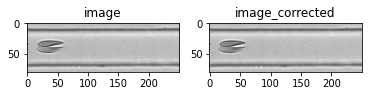

Acquisition time of the picture above: 0.011875 ---------



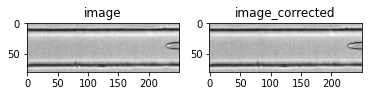

Acquisition time of the picture above: 0.10125 ---------



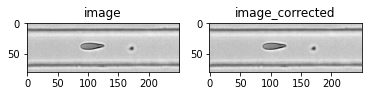

Acquisition time of the picture above: 0.131875 ---------



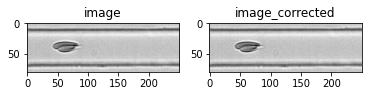

Acquisition time of the picture above: 0.145 ---------



In [ ]:
# Detect if there is any background brightness drift over time and correct for it
#Take first 5 images for the example. Full length for the iteration should be len(ds["image"])
for i in range (1,5):
  image = ds["image"][i]
  mask = ds["mask"][i]

  image_0 = ds["image"][i-1]
  mask_0 = ds["mask"][i-1]  
  
  bright_bg_avg_1 = np.mean(image[(1-mask)*(1-mask_0)])
  bright_bg_avg_0 = np.mean(image_0[(1-mask)*(1-mask_0)])  

  image_corrected = image - (bright_bg_avg_1 - bright_bg_avg_0)

  plt.subplot(121, title="image")
  plt.imshow(image, cmap="gray")
  plt.subplot(122, title="image_corrected")
  plt.imshow(image_corrected, cmap="gray")
  plt.show()
  print('Acquisition time of the picture above:',ds['time'][i], '---------\n')